In [1]:
import pandas_datareader.data as web
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
#plt.style.use('ggplot')
%matplotlib inline

In [2]:
etf_df = pd.read_csv("resources/etf_df.csv")

### Period Datasets
1M, 3M, 6M, 1Y, 5Y, 10Y, and MAX

In [3]:
# last date configured
last_date = list(etf_df.Date)[-1]
last_split = last_date.split('-')
d_list = [int(i) for i in last_split]
date = dt.date(d_list[0], d_list[1], d_list[2])

In [4]:
# calculate the dates from the last data point for 1m, 3m, 6m, 1y, 5y, and 10y...
# ...then convert to string format for filtering DataFrame
one_mo = (date - dt.timedelta(days=30.4167)).strftime("%Y-%m-%d")
three_mo = (date - dt.timedelta(days=91.2501)).strftime("%Y-%m-%d")
six_mo = (date - dt.timedelta(days=182.5)).strftime("%Y-%m-%d")
one_yr = (date - dt.timedelta(days=365)).strftime("%Y-%m-%d")
five_yr = (date - dt.timedelta(days=1825)).strftime("%Y-%m-%d")
ten_yr = (date - dt.timedelta(days=3650)).strftime("%Y-%m-%d")

In [5]:
etf_df.loc[(etf_df.symbol == 'QQQ')&(etf_df.Date >= ten_yr)&(etf_df.Date <= last_date)]

,Date,Open,High,Low,Close,Adj Close,Volume,symbol
3178,2011-10-24,57.509998,58.650002,57.310001,58.490002,52.970970,61449500,QQQ
3179,2011-10-25,58.299999,58.320000,57.220001,57.340000,51.929482,65299200,QQQ
3180,2011-10-26,57.660000,57.779999,56.209999,57.270000,51.866089,98193800,QQQ
3181,2011-10-27,58.639999,59.200001,58.029999,58.849998,53.296997,104455500,QQQ
3182,2011-10-28,58.520000,59.009998,58.500000,58.939999,53.378498,42950000,QQQ
...,...,...,...,...,...,...,...,...
5687,2021-10-13,359.510010,360.690002,357.429993,360.000000,360.000000,40120800,QQQ
5688,2021-10-14,363.690002,366.850006,363.010010,366.630005,366.630005,43433900,QQQ
5689,2021-10-15,367.880005,369.059998,366.820007,368.940002,368.940002,40391000,QQQ
5690,2021-10-18,367.609985,372.869995,366.989990,372.649994,372.649994,34240700,QQQ


### 1. Relative Returns

In [6]:
# three lists created to cover possible portfolio combinations to display
qqq_symbols = ['QQQ', 'SPLG', 'DIA', 'VEU']
sp_symbols = ['QQQ', 'SPLG', 'IVV', 'VOO', 'SPY', 'DIA']
glob_symbols = ['QQQ', 'SPLG', 'ACWI', 'VEU', 'VSS']

#list of lists...
portfolios = [qqq_symbols, sp_symbols, glob_symbols]

# list of years we need a portfolio display for
dates_list = [one_mo, three_mo, six_mo, one_yr, five_yr, ten_yr]
dates_str = ['1M', '3M', '6M', '1Y', '5Y', '10Y']

This next section investigates an error that suddenly appeared when updating, preventing the code from completing all graphs

In [7]:
# first step is to determine which ETF has a different size dataset than the others
for sym in qqq_symbols:
    df_filter = etf_df.loc[(etf_df.symbol == sym)&(etf_df.Date >= ten_yr)&(etf_df.Date <= last_date)]
    print("-"*12)
    print(sym)
    print(len(list(df_filter.Close)))
    print(len(list(df_filter.Date)))

------------
QQQ
2514
2514
------------
SPLG
2488
2488
------------
DIA
2514
2514
------------
VEU
2514
2514


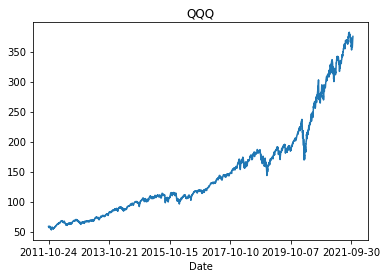

In [8]:
# function to graph the ten year closing values, to visualize the difference between SPLG and other ETFs
def graph(sym):
    df_filter = etf_df.loc[(etf_df.symbol == sym)&(etf_df.Date >= ten_yr)&(etf_df.Date <= last_date)]
    df_filter.set_index("Date", inplace = True)
    plt.title(f'{sym}')
    df_filter.Close.plot()
    
graph('QQQ')

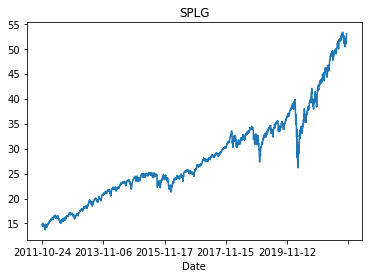

In [9]:
# something is definitely different here, given the smaller dataset size and missing dates in the graph here
graph('SPLG')

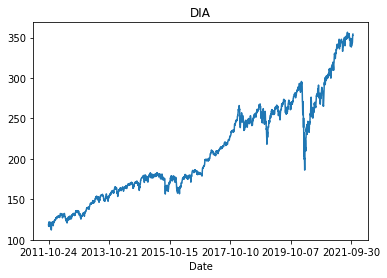

In [10]:
graph('DIA')

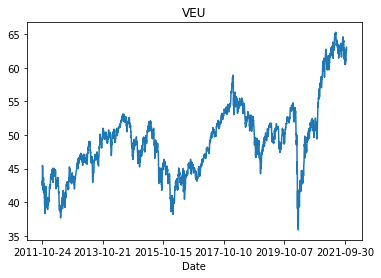

In [11]:
graph('VEU')

In [12]:
# confirm no null values
null_df = etf_df.loc[(etf_df.symbol == 'SPLG')&(etf_df.Date >= ten_yr)&(etf_df.Date <= last_date)]
null_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
symbol       0
dtype: int64

In [13]:
# cofirm that we have the same start and end dates for collecting data
for sym in qqq_symbols:
    df_filter = etf_df.loc[(etf_df.symbol == sym)&(etf_df.Date >= ten_yr)&(etf_df.Date <= last_date)]
    print("-"*12)
    print(sym)
    print(list(df_filter.Date)[0])
    print(list(df_filter.Date)[-1])

------------
QQQ
2011-10-24
2021-10-19
------------
SPLG
2011-10-24
2021-10-19
------------
DIA
2011-10-24
2021-10-19
------------
VEU
2011-10-24
2021-10-19


In [14]:
# create two lists of dates to compare how badly matched our datasets are
qqq_filter = etf_df.loc[(etf_df.symbol == 'QQQ')&(etf_df.Date >= ten_yr)&(etf_df.Date <= last_date)]
qqq_dates = list(qqq_filter.Date)

splg_filter = etf_df.loc[(etf_df.symbol == 'SPLG')&(etf_df.Date >= ten_yr)&(etf_df.Date <= last_date)]
splg_dates = list(splg_filter.Date)

In [15]:
# iterate through SPLG dates to find mismatches with QQQ dates
weird_dates = []

for i in range(len(splg_dates)):
    if splg_dates[i] != qqq_dates[i]:
        weird_dates.append({splg_dates[i]: qqq_dates[i]})

In [16]:
# it appears that many dates are missing, causing numerous mismatches in the arrays
len(weird_dates)

2446

For some reason, SPLG data is missing data for 10 year comparisons.  Since further investigation is not necessary at this point, it will be removed in order to maintain the dashboard

In [17]:
# three lists redefined to cover possible portfolio combinations to display
qqq_symbols = ['QQQ', 'DIA', 'VEU']
sp_symbols = ['QQQ', 'IVV', 'VOO', 'SPY', 'DIA']
glob_symbols = ['QQQ', 'ACWI', 'VEU', 'VSS']

#list of lists...
portfolios = [qqq_symbols, sp_symbols, glob_symbols]

In [18]:
# create function that exports a DataFrame for the list of symbols' relative returns
def rel_returns(symbols, start):
    df = pd.DataFrame(columns = symbols)
    for symbol in symbols:
        df_filter = etf_df.loc[(etf_df.symbol == symbol)&(etf_df.Date >= start)&(etf_df.Date <= last_date)]
        df[symbol] = list(df_filter.Close)
    df['Date'] = list(df_filter.Date)
    df.set_index("Date", inplace = True)
    returns = (df/df.iloc[0])
    return returns

def close_compare(symbols, start):
    df = pd.DataFrame(columns = symbols)
    for symbol in symbols:
        df_filter = etf_df.loc[(etf_df.symbol == symbol)&(etf_df.Date >= start)&(etf_df.Date <= last_date)]
        df[symbol] = list(df_filter.Close)
    df['Date'] = list(df_filter.Date)
    df.set_index("Date", inplace = True)
    return df

In [19]:
# create function that exports two charts for every period specified in dates_list...
# ...one for Close price and one for relative returns
def returns_charts(symbols):
    for x in range(len(dates_list)):
        new_df = rel_returns(symbols, dates_list[x])
        new_df.plot(figsize=(10,8))
        plt.title(f'Relative Returns: {dates_str[x]}, {last_date}', fontsize=24)
        plt.xlabel('Date', fontsize=22)
        plt.legend(fontsize=18)
        plt.grid()
        plt.tight_layout()
        plt.savefig(f"../images/returns/returns_{symbols[-1]}_{dates_str[x]}.jpg", dpi=75)
        plt.clf()
        
def close_charts(symbols):
    for x in range(len(dates_list)):
        new_df = close_compare(symbols, dates_list[x])
        new_df.plot(figsize=(10,8))
        plt.title(f'Close: {dates_str[x]}, {last_date}', fontsize=24)
        plt.xlabel('Date', fontsize=22)
        plt.legend(fontsize=18)
        plt.grid()
        plt.tight_layout()
        plt.savefig(f"../images/close/close_{symbols[-1]}_{dates_str[x]}.jpg", dpi=75)
        plt.clf()

In [20]:
returns_charts(qqq_symbols)
returns_charts(sp_symbols)
returns_charts(glob_symbols)

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [21]:
close_charts(qqq_symbols)
close_charts(sp_symbols)
close_charts(glob_symbols)

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

### 2. Volatility - Histograms

In [22]:
df = rel_returns(qqq_symbols, ten_yr)

In [23]:
df

,QQQ,DIA,VEU
Date,,,
2011-10-24,1.000000,1.000000,1.000000
2011-10-25,0.980338,0.982419,0.985147
2011-10-26,0.979142,0.996046,1.000928
2011-10-27,1.006155,1.025740,1.055001
2011-10-28,1.007694,1.026581,1.046414
...,...,...,...
2021-10-13,6.154898,2.892749,1.431887
2021-10-14,6.268251,2.936827,1.443722
2021-10-15,6.307745,2.968119,1.456022


In [24]:
# create histograms for returns, qqq_symbols list
for x in range(len(dates_list)):
    df = rel_returns(qqq_symbols, dates_list[x])
    df.QQQ.hist(bins=50, figsize=(10,8), label='QQQ', alpha=0.5)
    #df.SPLG.hist(bins=50, label='SPLG', alpha=0.5)
    df.DIA.hist(bins=50, label='DIA', alpha=0.5)
    df.VEU.hist(bins=50, label='VEU', alpha=0.5)
    plt.title(f'Volatility: {dates_str[x]}, {last_date}', fontsize=24)
    plt.legend(fontsize=18)
    plt.tight_layout()
    plt.savefig(f"../images/vol_hist/histogram_qqq_symbols_{dates_str[x]}.jpg", dpi=75)
    plt.clf()

<Figure size 720x576 with 0 Axes>

In [25]:
# create histograms kernel for clarity, qqq_symbols list
for x in range(len(dates_list)):
    df = rel_returns(qqq_symbols, dates_list[x])
    df.QQQ.plot(kind='kde', label='QQQ', figsize=(10,8))
    #df.SPLG.plot(kind='kde', label='SPLG')
    df.DIA.plot(kind='kde', label='DIA')
    df.VEU.plot(kind='kde', label='VEU')
    plt.title(f'Volatility Normalized: {dates_str[x]}, {last_date}', fontsize=24)
    plt.legend(fontsize=18)
    plt.tight_layout()
    plt.grid()
    plt.savefig(f"../images/vol_hist/ked_hist_qqq_symbols_{dates_str[x]}.jpg", dpi=75)
    plt.clf()

<Figure size 720x576 with 0 Axes>

In [26]:
# repeat operations for sp_symbols, glob_symbols
for x in range(len(dates_list)):
    df = rel_returns(sp_symbols, dates_list[x])
    df.QQQ.hist(bins=50, figsize=(10,8), label='QQQ', alpha=0.5)
    #df.SPLG.hist(bins=50, label='SPLG', alpha=0.5)
    df.IVV.hist(bins=50, label='IVV', alpha=0.5)
    df.VOO.hist(bins=50, label='VOO', alpha=0.5)
    df.SPY.hist(bins=50, label='SPY', alpha=0.5)
    df.DIA.hist(bins=50, label='DIA', alpha=0.5)
    plt.title(f'Volatility: {dates_str[x]}, {last_date}', fontsize=24)
    plt.legend(fontsize=18)
    plt.tight_layout()
    plt.savefig(f"../images/vol_hist/histogram_sp_symbols_{dates_str[x]}.jpg", dpi=75)
    plt.clf()
for x in range(len(dates_list)):
    df = rel_returns(sp_symbols, dates_list[x])
    df.QQQ.plot(kind='kde', label='QQQ', figsize=(10,8))
    #df.SPLG.plot(kind='kde', label='SPLG')
    df.IVV.plot(kind='kde', label='IVV')
    df.VOO.plot(kind='kde', label='VOO')
    df.SPY.plot(kind='kde', label='SPY')
    df.DIA.plot(kind='kde', label='DIA')
    plt.title(f'Volatility Normalized: {dates_str[x]}, {last_date}', fontsize=24)
    plt.legend(fontsize=18)
    plt.tight_layout()
    plt.grid()
    plt.savefig(f"../images/vol_hist/ked_hist_sp_symbols_{dates_str[x]}.jpg", dpi=75)
    plt.clf()

<Figure size 720x576 with 0 Axes>

In [27]:
for x in range(len(dates_list)):
    df = rel_returns(glob_symbols, dates_list[x])
    df.QQQ.hist(bins=50, figsize=(10,8), label='QQQ', alpha=0.5)
    #df.SPLG.hist(bins=50, label='SPLG', alpha=0.5)
    df.ACWI.hist(bins=50, label='ACWI', alpha=0.5)
    df.VEU.hist(bins=50, label='VEU', alpha=0.5)
    df.VSS.hist(bins=50, label='VSS', alpha=0.5)
    plt.title(f'Volatility: {dates_str[x]}, {last_date}', fontsize=24)
    plt.legend(fontsize=18)
    plt.tight_layout()
    plt.savefig(f"../images/vol_hist/histogram_glob_symbols_{dates_str[x]}.jpg", dpi=75)
    plt.clf()
for x in range(len(dates_list)):
    df = rel_returns(glob_symbols, dates_list[x])
    df.QQQ.plot(kind='kde', label='QQQ', figsize=(10,8))
    #df.SPLG.plot(kind='kde', label='SPLG')
    df.ACWI.plot(kind='kde', label='ACWI')
    df.VEU.plot(kind='kde', label='VEU')
    df.VSS.plot(kind='kde', label='VSS')
    plt.title(f'Volatility Normalized: {dates_str[x]}, {last_date}', fontsize=24)
    plt.legend(fontsize=18)
    plt.tight_layout()
    plt.grid()
    plt.savefig(f"../images/vol_hist/ked_hist_glob_symbols_{dates_str[x]}.jpg", dpi=75)
    plt.clf()

<Figure size 720x576 with 0 Axes>

### Correlation

In [28]:
from pandas.plotting import scatter_matrix

In [29]:
def scatter_plots(portfolio_list):
    for portfolio in portfolio_list:
        for x in range(len(dates_list)):
            df = close_compare(portfolio, dates_list[x])
            scatter_matrix(df, figsize=(10,10), color='dodgerblue', hist_kwds={'color':'lightblue', 'alpha':0.50, 'bins':50})
            plt.tight_layout()
            plt.savefig(f"../images/correlation/scatter_{portfolio[-1]}_{dates_str[x]}.jpg", dpi=150)
            plt.clf()

In [30]:
scatter_plots(portfolios)

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

### Monte Carlo Simulation
Currently discontinued

In [31]:
# create function that randomly selects a 60 day period 1000 times, plots the simulation and...
# an easier to read quantile version
#def monte_carlo(portfolio):
    #for x in range(len(dates_list)):
        #stocks = close_compare(portfolio, dates_list[x])
        #prf_returns = (stocks.pct_change() +1)[1:]
        #simulated = pd.DataFrame([((prf_returns.iloc[random.choices(range(len(prf_returns)), k=60)])\
                        #.mean(axis=1)).cumprod().values for x in range(1000)]).T
        #simulated.plot(legend=False, linewidth=1, alpha=0.1, color='blue', figsize=(12,8))
        #plt.tight_layout()
        #plt.savefig(f"../images/monte_carlo/simulated_{portfolio[-1]}_{dates_str[x]}.jpg", dpi=150)
        #plt.clf()
        #simulated.quantile([0.05, 0.50, 0.95], axis=1).T.plot(figsize=(12,8))
        #plt.legend(fontsize=18)
        #plt.tight_layout()
        #plt.savefig(f"../images/monte_carlo/quantile_{portfolio[-1]}_{dates_str[x]}.jpg", dpi=75)
        #plt.clf()

In [32]:
#monte_carlo(qqq_symbols)

In [33]:
#monte_carlo(sp_symbols)

In [34]:
#monte_carlo(glob_symbols)